# Dampak Jenis Bahan bakar terhadap Emisi CO2: Analisis Perbandingan Bahan Bakar Regular Gasoline, Premium Gasoline, Diesel and Ethanol

<p align="center">
  <img src="https://www.frost.com/wp-content/uploads/2022/06/GettyImages-1294597903-1.jpg" />
</p>

Perubahan iklim global dan masalah lingkungan semakin menjadi perhatian utama di seluruh dunia. Salah satu kontributor utama terhadap perubahan iklim adalah emisi gas rumah kaca, termasuk emisi karbon dioksida (CO2) yang dihasilkan oleh sektor transportasi. Seiring dengan peningkatan jumlah kendaraan bermotor, penting untuk memahami dampak jenis bahan bakar yang digunakan terhadap emisi CO2.

Dalam industri otomotif, ada beberapa jenis bahan bakar yang umum digunakan, termasuk bensin reguler, bensin premium, diesel, dan etanol. Setiap jenis bahan bakar memiliki karakteristik yang berbeda dan dapat mempengaruhi tingkat emisi CO2 yang dihasilkan oleh kendaraan. Dalam konteks ini, perlu analisis perbandingan antara jenis bahan bakar ini dapat memberikan wawasan yang berharga tentang dampak lingkungan yang dihasilkan oleh masing-masing jenis bahan bakar.

# Import Library

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Feature selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Algoritma model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Model Saving
import joblib


# Data Loading

In [2]:
df = pd.read_csv('D:\Learn a New Thing\Dqlab\TETRIS program\Capstone Project\CO2 Emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### Keterangan pada Dataset

Model
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

Transmission
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

Fuel type
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas

In [3]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
# Statistik Deskriptif
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# EDA

#### Cleansing Data

In [5]:
# Drop Unnecesarry columns
df =df.drop(columns=df.iloc[:,7:9])

## Replace Value

In [6]:
# Replace values
unique_values = df['Transmission'].unique()

# Replace 'M' with 'Manual' and other unique values with 'Automatic'
a = np.where(np.isin(df['Transmission'], ['M5', 'M6', 'M7']), 'Manual', 'Automatic')

# Assign the modified values back to the 'Transmission' column
df['Transmission'] = a

print(df['Transmission'])


0       Automatic
1          Manual
2       Automatic
3       Automatic
4       Automatic
          ...    
7380    Automatic
7381    Automatic
7382    Automatic
7383    Automatic
7384    Automatic
Name: Transmission, Length: 7385, dtype: object


In [7]:
# Replace fuel type
df['Fuel Type']= df['Fuel Type'].replace({'X' : 'Regular Gasoline', 'Z' : 'Premium Gasoline', 'D':'Diesel',
                                       'E':'Ethanol', 'N':'Natural gas'})

In [8]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Premium Gasoline,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Premium Gasoline,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Premium Gasoline,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Premium Gasoline,10.6,27,244


## Visualization

### Analysis Univariate

In [9]:
df[['Fuel Type']].value_counts()

Fuel Type       
Regular Gasoline    3637
Premium Gasoline    3202
Ethanol              370
Diesel               175
Natural gas            1
dtype: int64

Pada dataset khusunya pada Fuel Type, hanya terdapat 1 data mobil yang menggunakan fuel type Natural gas

In [10]:
# drop values natural gas 
df.drop(index=df.index[2439], axis=0, inplace=True)

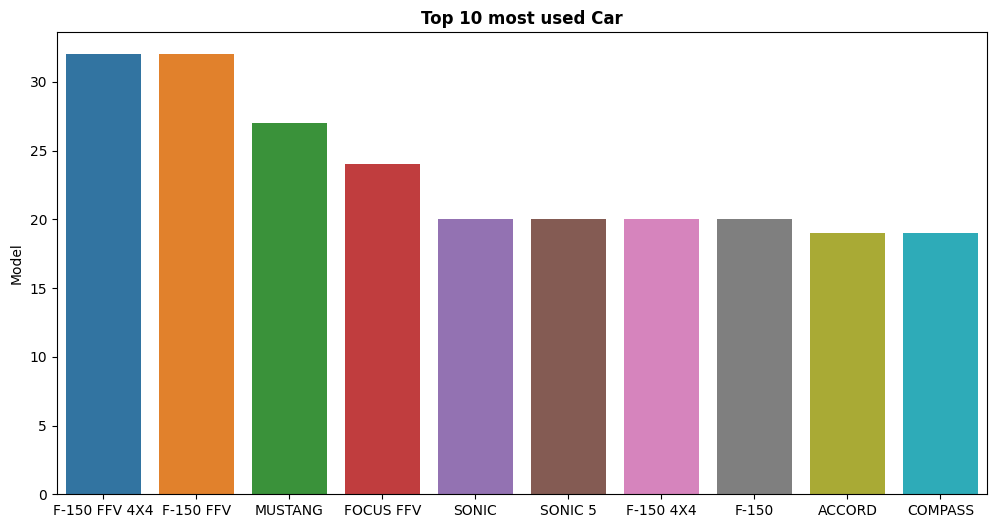

In [11]:
# Bar plot for the most used car
car_model = df['Model'].value_counts().head(10)

# barplot
plt.figure(figsize=(12,6))
sns.barplot(df, x=car_model.index, y=car_model)
plt.title('Top 10 most used Car', fontsize = "large", fontweight = "bold")
plt.show()

Data mobil yang paling banyak digunakan adalah `F-150 FFV 4X4, F-150 FFV, Mustang, FOCUS FFV, SONIC dan lain-lain` 

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_19092\2815567002.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


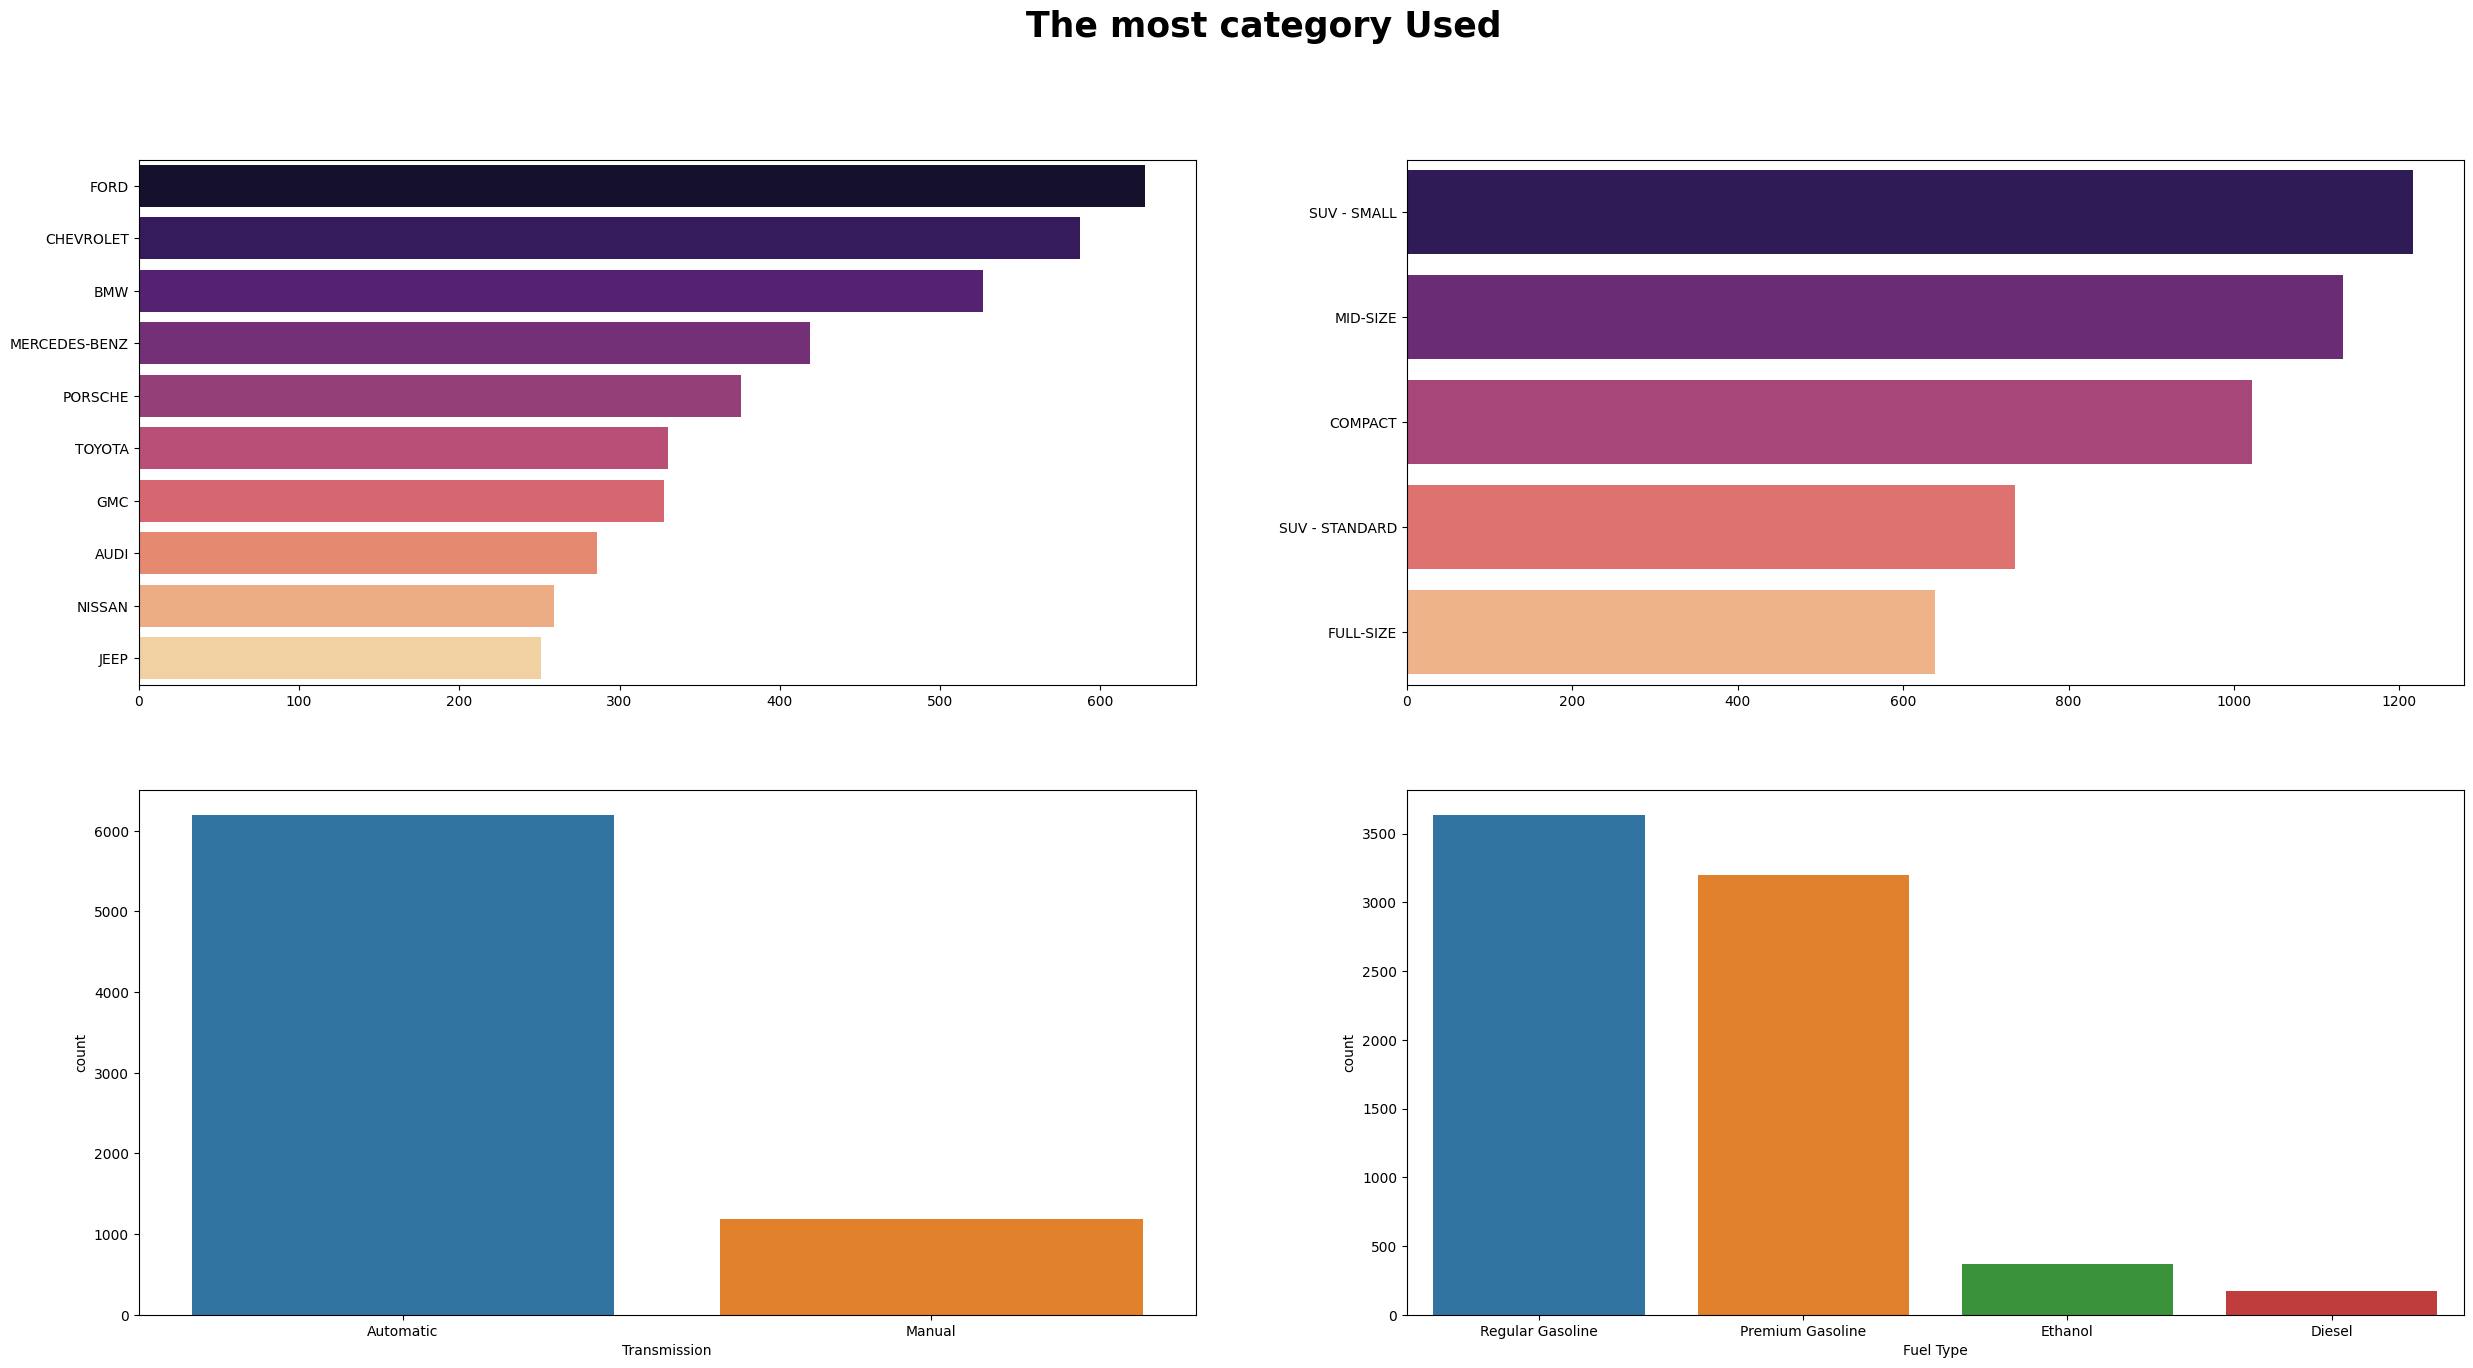

In [12]:
# Sort the DataFrame by count of Brand and Vehicle Class
make = df['Make'].value_counts().sort_values(ascending=False).head(10)
vehicle_class = df['Vehicle Class'].value_counts().sort_values(ascending=False).head(5)



# Visualize
plt.subplots(figsize=(30,15))
plt.suptitle('The most category Used', fontsize = 25, fontweight = "bold")

# Create the bar plot
plt.subplot(221)
sns.barplot(y=make.index, x=make.values, palette='magma')

plt.subplot(222)
sns.barplot(y=vehicle_class.index, x=vehicle_class.values, palette='magma')

plt.subplot(223)
sns.countplot(df, x=df['Transmission'])

plt.subplot(224)
sns.countplot(df, x=df['Fuel Type'].sort_values(ascending=False))

plt.show()

Dari visualisai diatas dapat kita lihat bahwa:
- Brand mobil yang paling banyak digunakan adalah `FORD diikuti oleh CHEVROLET, BMW, MERCHEDES-BENZ dll`
- Berdasarkan jenisnya mobil yang paling banyak digunakan adalah `SUV-Small, Mid Size, Compact, SUV Standard dan Full size`
- Pengguna mobil lebih banyak menggunakan mobil dengan transmisi Automatic
- Jenis bahan bakar yang paling banyak digunakan adalah `Regular Gasoline, Premium Gasoline, Ethanol, Diesel`

### Analysis Bivariate

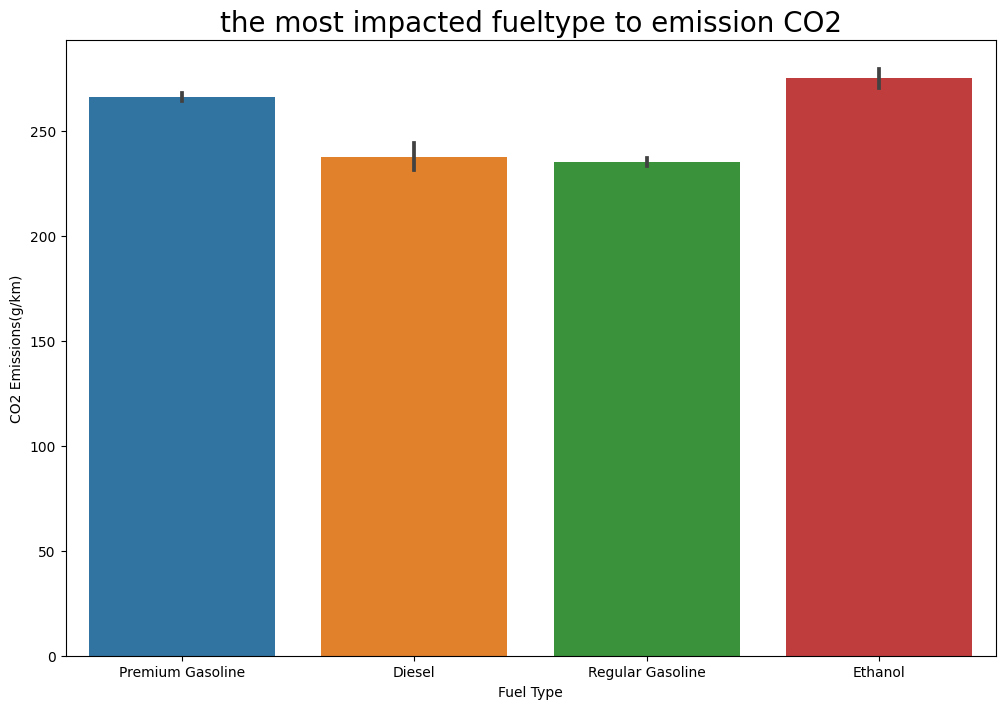

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(df, x= df['Fuel Type'], y=df['CO2 Emissions(g/km)'])
plt.title('the most impacted fueltype to emission CO2', fontsize=20)
plt.show()

In [14]:
df.groupby(['Fuel Type'])[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)',ascending=False)

,CO2 Emissions(g/km)
Fuel Type,
Ethanol,275.091892
Premium Gasoline,266.043410
Diesel,237.548571
Regular Gasoline,235.119329


Berdasarkan jenis bahan bakar, rata-rata emisi dihasilkan paling banyak oleh bahan bakar Ethanol dan yang paling sedikit adalah Regular Gasoline 

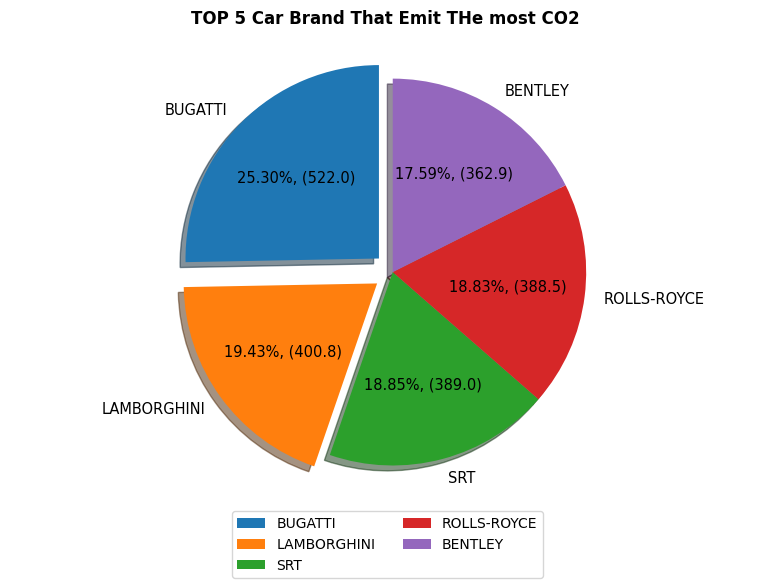

In [15]:
top5_brand = df.groupby(df['Make'])[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)', ascending=False).head(5)
top_5 = top5_brand.index.tolist()
co2_emissions = top5_brand['CO2 Emissions(g/km)'].tolist()


plt.figure(figsize=(8,6))
plt.pie(co2_emissions,
        labels=top_5,
        shadow=True,
        explode=[0.1, 0.1, 0, 0, 0],
        autopct=lambda p:f'{p:.2f}%, ({p*sum(co2_emissions)/100 :.1f})',
        textprops={"fontsize": 10.5},
        startangle=90)


plt.title("TOP 5 Car Brand That Emit THe most CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(top_5, ncol = 2, loc="best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')

plt.axis("equal")
plt.tight_layout()
plt.show()

In [16]:
df.groupby(df['Make'])[['CO2 Emissions(g/km)']].mean().sort_values(by=['CO2 Emissions(g/km)'], ascending=False).head()

,CO2 Emissions(g/km)
Make,
BUGATTI,522.000000
LAMBORGHINI,400.780488
SRT,389.000000
ROLLS-ROYCE,388.480000
BENTLEY,362.934783


5 Brand mobil yang paling banyak menyumbangkan emisi CO2 adalah `BUGATTI, LAMBORGHINI, SRT,ROLLS-ROYCE dan BENTLEY` kelima brand tersebut merupakan hypercar dengan `Engine Size` yang sangat besar dan jumlmah silinder yang banyak, sehingga hal tersebut merupakan salah satu data pendukung yang menyebabkan semakin besarnya emisi CO2 yang dihasilkan 

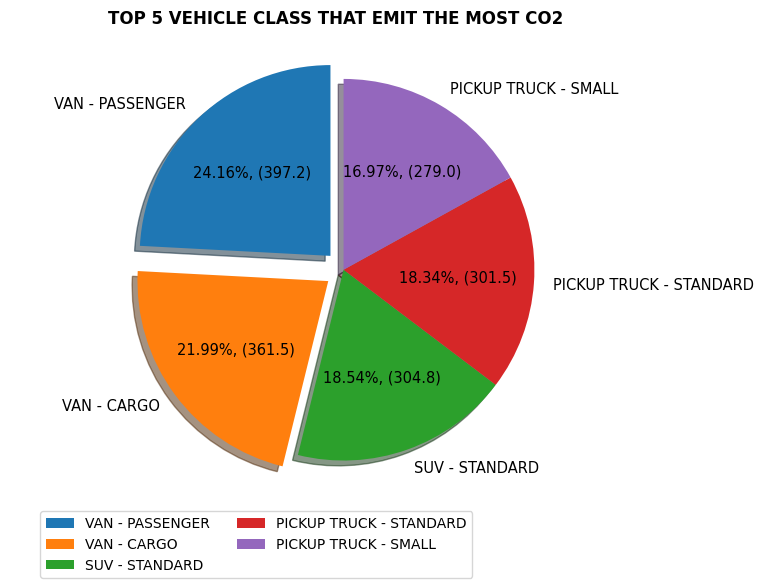

In [17]:
top_5 = df.groupby(df['Vehicle Class'])[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)', ascending=False).head(5)
top_classes = top_5.index.tolist()
co2_emissions = top_5['CO2 Emissions(g/km)'].tolist()


plt.figure(figsize=(8,6))
plt.pie(co2_emissions,
        labels=top_classes,
        shadow=True,
        explode=[0.1, 0.1, 0, 0, 0],
        autopct=lambda p:f'{p:.2f}%, ({p*sum(co2_emissions)/100 :.1f})',
        textprops={"fontsize": 10.5},
        startangle=90)


plt.title("TOP 5 VEHICLE CLASS THAT EMIT THE MOST CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(top_classes, ncol = 2, loc = "best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')

plt.axis("equal")
plt.tight_layout()
plt.show()

In [18]:
df.groupby(df['Vehicle Class'])[['CO2 Emissions(g/km)']].mean().sort_values(by=['CO2 Emissions(g/km)'], ascending=False).head()

,CO2 Emissions(g/km)
Vehicle Class,
VAN - PASSENGER,397.212121
VAN - CARGO,361.500000
SUV - STANDARD,304.836735
PICKUP TRUCK - STANDARD,301.513011
PICKUP TRUCK - SMALL,278.968553


5 Jenis mobil yang paling banyak menyumbang emisi gas $CO^2$ adalah `Van-Passenger, Van-Cargo, SUV-Standard, Pickup Truck -Standard, Pickup truk-Small` 

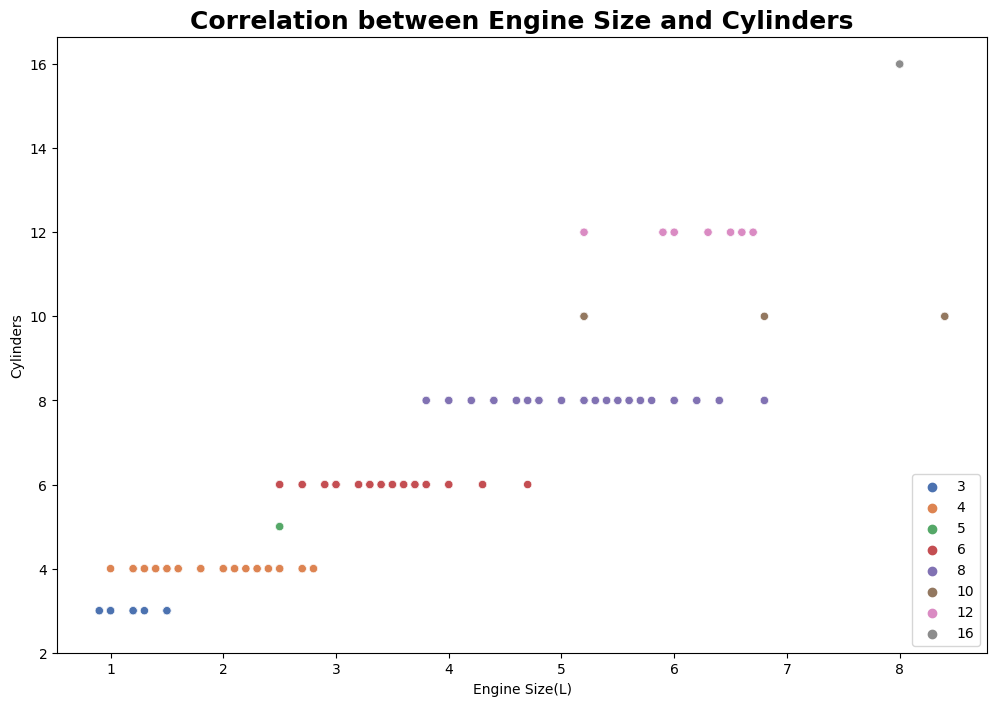

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x=df['Engine Size(L)'], y=df['Cylinders'], hue='Cylinders', palette='deep')
plt.ylim(2,)
plt.title('Correlation between Engine Size and Cylinders', fontsize=18, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

Dari Visualisasi diatas dapat dilihat bahwa semakin besar `Engine Size` maka jumlah `Cylinders` akan semakin banyak, hal ini karena mesin dengan cc yang lebih besar memiliki lebih banyak ruang pembakaran, sehingga dibutuhkan jumlah silinder yang lebih banyak untuk menyempurnakan pembakaran.

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_19092\2951951741.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


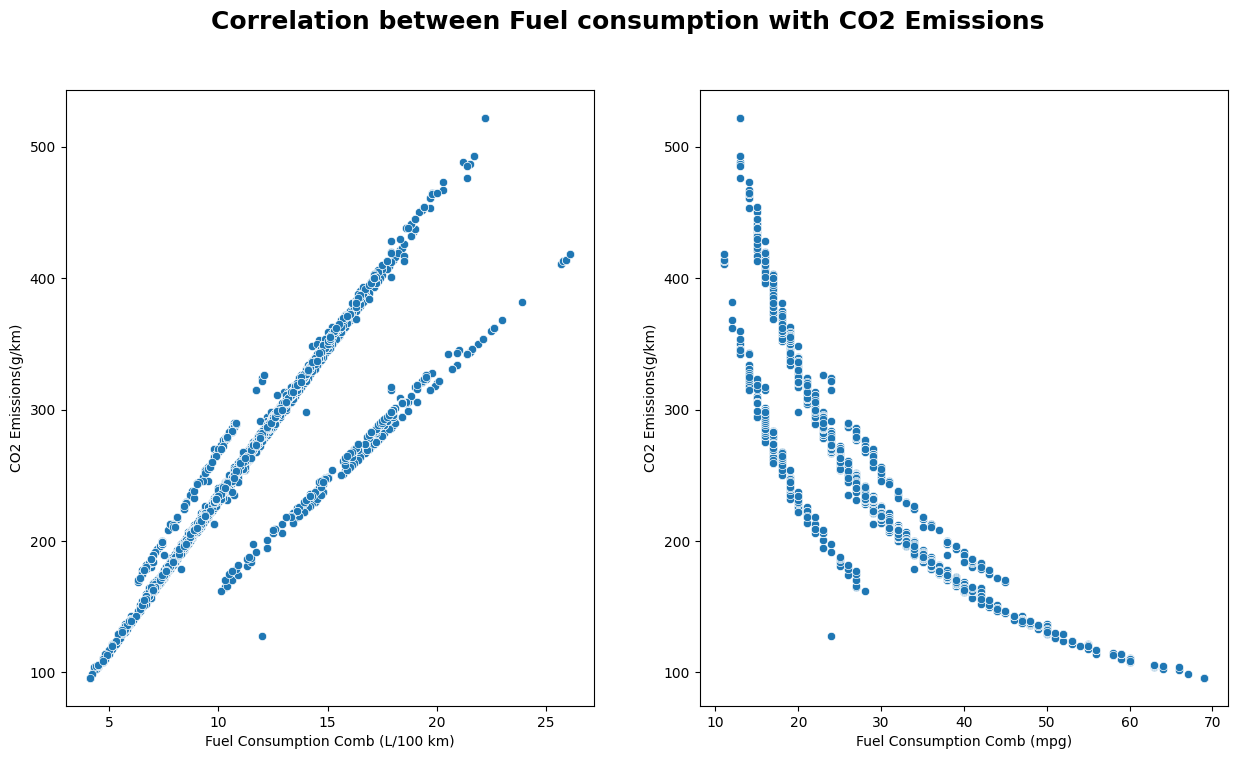

In [20]:
# Correlation between fuel consumption

plt.subplots(figsize=(15,8))

plt.subplot(121)
sns.scatterplot(df, x=df['Fuel Consumption Comb (L/100 km)'], y=df['CO2 Emissions(g/km)'])

plt.subplot(122)
sns.scatterplot(df, x=df['Fuel Consumption Comb (mpg)'], y=df['CO2 Emissions(g/km)'])

plt.suptitle('Correlation between Fuel consumption with CO2 Emissions', fontsize=18, fontweight='bold')
plt.show()

Dari visualisasi diatas dapat kita lihat bahwa :
- pada gambar sebelah kiri semakin banyak konsumsi bahan bakar maka akan menghasilkan emisi CO2 yang lebih banyak.
- sedangkan pada gambar sebelah kanan, semakin besar jarak yang ditempuh dengan 1 galon bahan bakar maka emisi yang dihasilkan lebih sedikit

### Analysis Multivariate

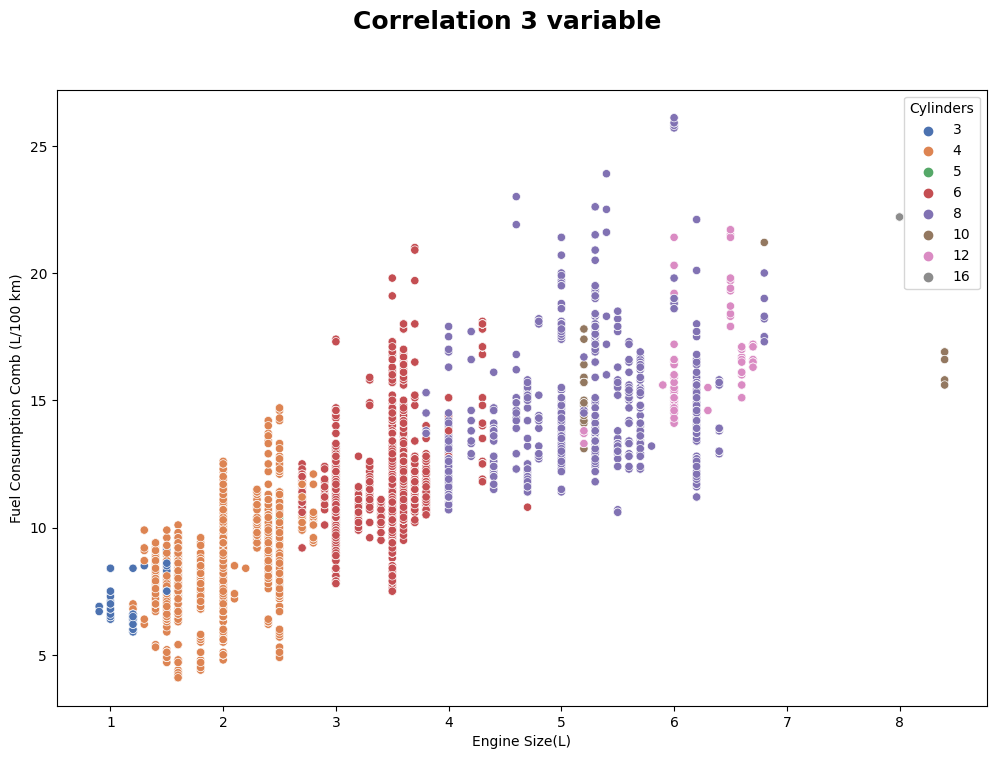

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, y=df['Fuel Consumption Comb (L/100 km)'], x=df['Engine Size(L)'], hue='Cylinders', palette='deep')
plt.suptitle('Correlation 3 variable', fontsize=18, fontweight='bold')
plt.show()

Dari gambar diatas dapat kita lihat bahwa besar nya kapasitas mesin (Engine Size(L)) dan banyaknya silinder akan mempengaruhi jumlah konsumsi bahan bakar pada mobil.

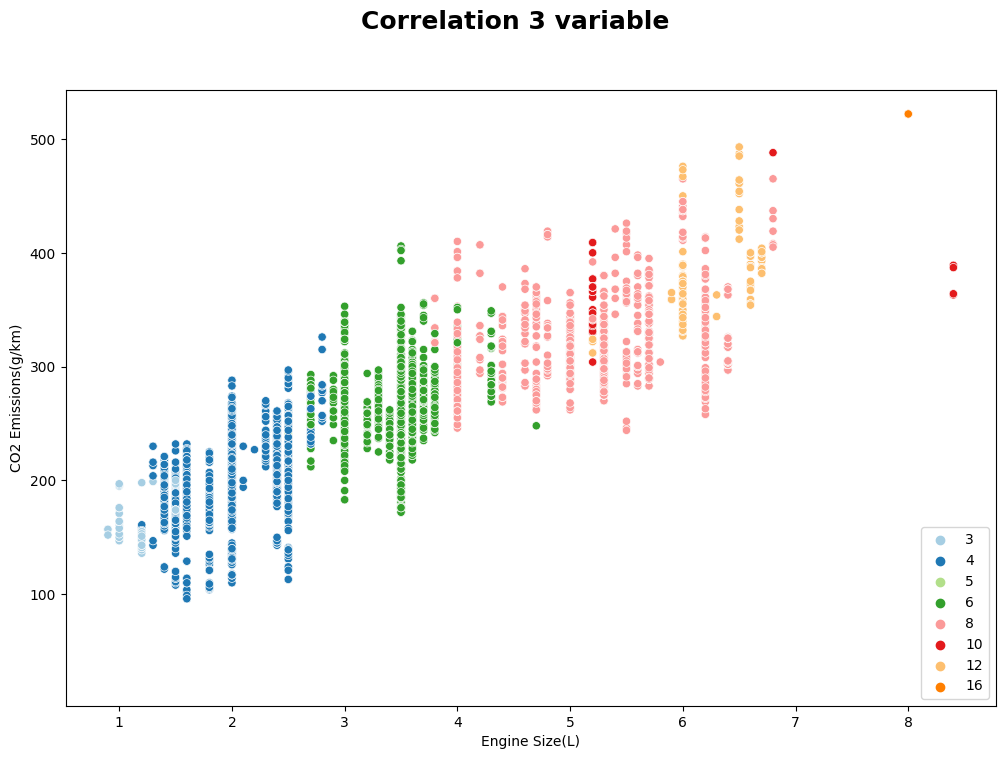

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x=df['Engine Size(L)'], y=df['CO2 Emissions(g/km)'], hue='Cylinders', palette='Paired')
plt.ylim(2,)
plt.legend(loc='lower right')
plt.suptitle('Correlation 3 variable', fontsize=18, fontweight='bold')
plt.show()

Dari analisis diatas dapat kita lihat bahwa semakin besar Engine Size dan semakin banyak silinder pada mesin maka emisi yang dihasilkan juga akan semakin meningkat

# Uji Hipotesis Testing

#### Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam emisi CO2 antara jenis bahan bakar.
#### Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam emisi CO2 antara jenis bahan bakar.

Critical Value = 0.05<br>
If P-Value < Critical Value : H1 diterima, jika P-value > Critical Value Maka H1 Ditolak

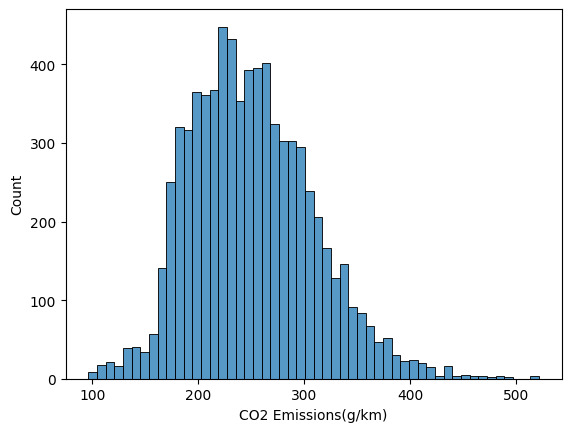

0.5258771730517156


In [23]:
# Distribution Data of CO2 Emissions
sns.histplot(df, x=df['CO2 Emissions(g/km)'])
plt.show()


print(df['CO2 Emissions(g/km)'].skew())

In [24]:
# Mean of CO2 Emissions
df['CO2 Emissions(g/km)'].mean()

250.58978873239437

In [25]:
df.groupby(df['Fuel Type'])[['CO2 Emissions(g/km)']].mean()

,CO2 Emissions(g/km)
Fuel Type,
Diesel,237.548571
Ethanol,275.091892
Premium Gasoline,266.043410
Regular Gasoline,235.119329


In [26]:
from scipy.stats import f_oneway

bensin_regular = df[df['Fuel Type'] == 'Regular Gasoline']['CO2 Emissions(g/km)']
bensin_premium = df[df['Fuel Type'] == 'Premium Gasoline']['CO2 Emissions(g/km)']
diesel = df[df['Fuel Type'] == 'Diesel']['CO2 Emissions(g/km)']
etanol = df[df['Fuel Type'] == 'Ethanol']['CO2 Emissions(g/km)']



In [27]:
# Melakukan uji ANOVA
stat, p_value = f_oneway(bensin_regular, bensin_premium, diesel, etanol)

# Menampilkan hasil
print('Hasil Uji ANOVA:')
print('Nilai F-statistic:', stat)
print('Nilai p-value:', p_value)

Hasil Uji ANOVA:
Nilai F-statistic: 198.44550602223688
Nilai p-value: 8.858263862102743e-124


Nilai P-Value sebesar $8.85^{-124}$. Hal ini menunjukkan bahwa P-Value < Critical Value, sehingga H1 diterima.<br> sehingga dapat disimpulkan bahwa terdapat perbedaan signifikan antara jenis bahan bakar dalam emisi CO2.

# Data Preprocessing

### Handling Missing Value

In [28]:
# missing value
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [29]:
#split inference
data_inf = df.sample(13, random_state=23)
data_train_test = df.drop(data_inf.index)

In [30]:
X = data_train_test.drop(columns=(['CO2 Emissions(g/km)']))
y = data_train_test['CO2 Emissions(g/km)']

X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Premium Gasoline,8.5,33
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,9.6,29
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Premium Gasoline,5.9,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Premium Gasoline,11.1,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Premium Gasoline,10.6,27


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=77)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (5896, 9)
Test Size  :  (1475, 9)


### Handling Outlier

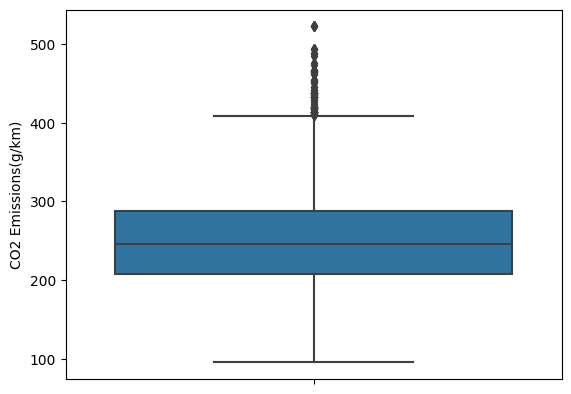

0.5099161141846738


In [32]:
sns.boxplot(data_train_test, y=df['CO2 Emissions(g/km)'])
plt.show()

print(y_train.skew())

Nilai skewness data sudah cukup baik sehingga tidak perlu dilakukan handling outliers

### Feature Engineering

#### Numeric Data

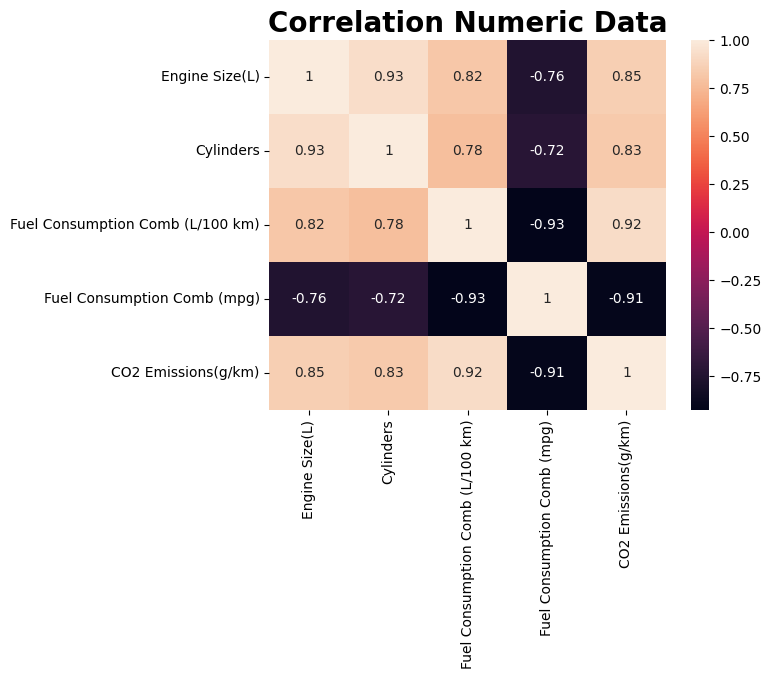

In [34]:
sns.heatmap(data_train_test[num_column].corr(), annot=True)
plt.title('Correlation Numeric Data', fontsize=20, fontweight='bold')
plt.show()

#### Categorical Data

In [35]:
cat_column = df.select_dtypes(include='object').columns.tolist()

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_cat = data_train_test[cat_column].apply(LabelEncoder().fit_transform)
df_cat

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,0,1057,0,0,2
1,0,1057,0,1,2
2,0,1058,0,0,2
3,0,1233,11,0,2
4,0,1499,11,0,2
...,...,...,...,...,...
7380,41,1951,11,0,2
7381,41,1957,11,0,2
7382,41,1960,11,0,2
7383,41,1968,12,0,2


In [37]:
anova = SelectKBest(score_func=f_regression, k=4)
anova.fit_transform(df_cat,data_train_test['CO2 Emissions(g/km)'])


anova_score = pd.DataFrame({'Anova_score':anova.scores_, 'P_value_anova': anova.pvalues_}, index=cat_column )
anova_score.sort_values(by=['P_value_anova'], ascending=True)


,Anova_score,P_value_anova
Vehicle Class,659.867545,1.897786e-139
Fuel Type,318.256919,1.001110e-69
Transmission,209.095099,9.410125e-47
Make,176.115936,9.738169e-40
Model,83.081232,9.991088e-20


Semua data memiliki nilai p-Value < 00.5 sehingga tidak ada feature yang harus di hapus, namun pada feature model terlalu banyak unique values sehingga perlu dilakukan penghapusan pada feature `Model`

### Scalling and Encoding

In [38]:
num = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [54]:
# Separate 2 types of data

X_train_final = X_train[num+cat]
X_test_final = X_test[num+cat]

X_train_final.reset_index(drop=True, inplace=True)
X_test_final.reset_index(drop=True, inplace=True)

In [55]:
preprocessor = ColumnTransformer(transformers=
    [('numerical',MinMaxScaler(), num), 
    ('categorical', OrdinalEncoder(), cat)]
)
preprocessor

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 ['Engine Size(L)', 'Cylinders',
                                  'Fuel Consumption Comb (L/100 km)',
                                  'Fuel Consumption Comb (mpg)']),
                                ('categorical', OrdinalEncoder(),
                                 ['Make', 'Vehicle Class', 'Transmission',
                                  'Fuel Type'])])

# Model Definition

In [56]:
# Definition 4 model
lr = LinearRegression()
rf = RandomForestRegressor(random_state=77)
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()


In [57]:
# model training using pipeline
pipeline_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("lr", lr)])

pipeline_rf = Pipeline(
    steps=[('preprcosseor', preprocessor), ('rf', rf)])

pipeline_gb = Pipeline(
    steps=[('preprcosseor', preprocessor), ('gb', gb)])

pipeline_knn = Pipeline(
    steps=[('preprocessor', preprocessor), ('knn', knn)])

In [68]:
pipeline_rf

Pipeline(steps=[('preprcosseor',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Make', 'Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type'])])),
                ('rf', RandomForestRegressor(random_state=77))])

# Model Training

In [58]:
pipeline_lr.fit(X_train_final,y_train)

pipeline_rf.fit(X_train_final,y_train)

pipeline_gb.fit(X_train_final,y_train)

pipeline_knn.fit(X_train_final,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Make', 'Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type'])])),
                ('knn', KNeighborsRegressor())])

In [59]:
# predict model
lr_pred_train = pipeline_lr.predict(X_train_final)
lr_pred_test = pipeline_lr.predict(X_test_final)

rf_pred_train = pipeline_rf.predict(X_train_final)
rf_pred_test = pipeline_rf.predict(X_test_final)

gb_pred_train = pipeline_gb.predict(X_train_final)
gb_pred_test = pipeline_gb.predict(X_test_final)

knn_pred_train = pipeline_knn.predict(X_train_final)
knn_pred_test = pipeline_knn.predict(X_test_final)

# Model Evaluation

In [60]:
all_reports= {}
score1 = {
        'Linear Regression -Trein'   : round(r2_score(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(r2_score(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(r2_score(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(r2_score(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(r2_score(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(r2_score(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(r2_score(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(r2_score(knn_pred_test,y_test ),2)
}
all_reports['R2score'] = score1

a = pd.DataFrame(all_reports)

In [61]:
score2 = {
        'Linear Regression -Trein'   : round(mean_absolute_error(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(mean_absolute_error(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(mean_absolute_error(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(mean_absolute_error(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(mean_absolute_error(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(mean_absolute_error(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_absolute_error(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_absolute_error(knn_pred_test,y_test ),2)
}
all_reports['MAE'] = score2

b = pd.DataFrame(all_reports)

In [62]:
# MAPE
score4 = {
        'Linear Regression -Trein'   : round(mean_absolute_percentage_error(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(mean_absolute_percentage_error(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(mean_absolute_percentage_error(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(mean_absolute_percentage_error(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(mean_absolute_percentage_error(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(mean_absolute_percentage_error(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_absolute_percentage_error(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_absolute_percentage_error(knn_pred_test,y_test ),2)
}
all_reports['MAPE'] = score4

c= pd.DataFrame(all_reports)


In [63]:
# RMSE
score3 = {
        'Linear Regression -Trein'   : round(np.sqrt(mean_squared_error(lr_pred_train,y_train)), 2),
        'Linear Regression -Test'    : round(np.sqrt(mean_squared_error(lr_pred_test, y_test)), 2),
        'Random Forest -Train'       : round(np.sqrt(mean_squared_error(rf_pred_train,y_train)),2),
        'Random Forest -Test'        : round(np.sqrt(mean_squared_error(rf_pred_test,y_test)),2),
        'GradientBoosting -Train'    : round(np.sqrt(mean_squared_error(gb_pred_train,y_train)),2),
        'GradientBoosting -Test'     : round(np.sqrt(mean_squared_error(gb_pred_test,y_test)),2),
        'KNeighborsRegressor -Train' : round(np.sqrt(mean_squared_error(knn_pred_train,y_train)),2),
        'KNeighborsRegressor -Test' : round(np.sqrt(mean_squared_error(knn_pred_test,y_test)),2)
}
all_reports['RMSE'] = score3

d= pd.DataFrame(all_reports)
d

,R2score,MAE,MAPE,RMSE
Linear Regression -Trein,0.90,11.43,0.04,17.22
Linear Regression -Test,0.90,11.73,0.05,17.91
Random Forest -Train,1.00,1.07,0.00,1.76
Random Forest -Test,1.00,2.00,0.01,3.32
GradientBoosting -Train,1.00,2.35,0.01,3.19
GradientBoosting -Test,1.00,2.59,0.01,3.50
KNeighborsRegressor -Train,0.97,5.09,0.02,9.94
KNeighborsRegressor -Test,0.93,7.66,0.03,14.85


# Model Saving

In [77]:
with open('pipeline_model_randomforest.pkl', 'wb') as file_1:
  joblib.dump(pipeline_rf, file_1)

with open('pipeline_model_randomforest.pkl', 'rb') as file_1:
  aw = joblib.load(file_1)

# Model Inference

In [64]:
# Menampilkan data inference
data_inf.head()
data_inf.reset_index(drop=True, inplace=True)

In [103]:
df['Make'].nunique()

42

In [65]:
# menentukan feature dan terget pada data inference
X_inf = data_inf.drop(columns={'CO2 Emissions(g/km)'})
y_inf = data_inf['CO2 Emissions(g/km)']

X_inf.reset_index(drop=True, inplace=True)
y_inf.reset_index(drop=True, inplace=True)

In [78]:
pred_inf = aw.predict(X_inf)

pred_inf_df = pd.DataFrame(pred_inf, columns=['CO2 Emissions- prediction'])
# membandingkan hasil prediksi dengan data aktual
pred_inf_df= pd.concat([y_inf,pred_inf_df], axis=1)
pred_inf_df

,CO2 Emissions(g/km),CO2 Emissions- prediction
0,383,380.977833
1,211,212.294826
2,193,193.299881
3,309,306.850000
4,181,181.905750
5,272,272.070000
6,178,176.347071
7,270,268.562560
8,183,183.628929
9,246,247.967877
